In [40]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as BS
import re
import matplotlib as plt
import seaborn as sns

In [4]:
page = 1
artists = []
year = []
while page != 18:
      url = f"https://countrymusichalloffame.org/hall-of-fame/members/page/{page}"
      print(url)
      response = requests.get(url)
      soup = BS(response.text)
      for h3 in soup.find_all("h3"):
        artists.append(h3.get_text(strip=True))
      y = str(soup.findAll(attrs={'class' : 'vertical-card_content--copy'}))
      y = re.findall(r"\d{4}", y)
      year.append(y)
      page = page + 1
flat_list=list()
for sub_list in year:
    flat_list += sub_list
year = flat_list

df1 = {'Artist':artists,'Year':year}
df1 = pd.DataFrame(df1)
df1

https://countrymusichalloffame.org/hall-of-fame/members/page/1
https://countrymusichalloffame.org/hall-of-fame/members/page/2
https://countrymusichalloffame.org/hall-of-fame/members/page/3
https://countrymusichalloffame.org/hall-of-fame/members/page/4
https://countrymusichalloffame.org/hall-of-fame/members/page/5
https://countrymusichalloffame.org/hall-of-fame/members/page/6
https://countrymusichalloffame.org/hall-of-fame/members/page/7
https://countrymusichalloffame.org/hall-of-fame/members/page/8
https://countrymusichalloffame.org/hall-of-fame/members/page/9
https://countrymusichalloffame.org/hall-of-fame/members/page/10
https://countrymusichalloffame.org/hall-of-fame/members/page/11
https://countrymusichalloffame.org/hall-of-fame/members/page/12
https://countrymusichalloffame.org/hall-of-fame/members/page/13
https://countrymusichalloffame.org/hall-of-fame/members/page/14
https://countrymusichalloffame.org/hall-of-fame/members/page/15
https://countrymusichalloffame.org/hall-of-fame/m

,Artist,Year
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
...,...,...
142,Hank Williams Jr.,2021
143,Bob Wills,1968
144,Mac Wiseman,2014
145,Tammy Wynette,1998


In [5]:
df1['Artist'] = df1['Artist'].str.replace(' ', '-')
df1['Artist'] = df1['Artist'].str.replace('”|“|\.', '')
df1

C:\Users\robsc\AppData\Local\Temp/ipykernel_31284/1352159475.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Artist'] = df1['Artist'].str.replace('”|“|\.', '')


,Artist,Year
0,Roy-Acuff,1962
1,Alabama,2005
2,Bill-Anderson,2001
3,Eddy-Arnold,1966
4,Chet-Atkins,1973
...,...,...
142,Hank-Williams-Jr,2021
143,Bob-Wills,1968
144,Mac-Wiseman,2014
145,Tammy-Wynette,1998


[Text(0, 0, '12'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '3'),
 Text(0, 0, '3')]

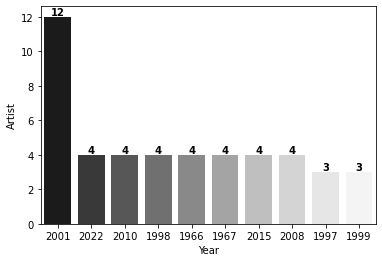

In [53]:
chart = df1.groupby(['Year'])['Artist'].count().sort_values(ascending=False).nlargest(10).to_frame()
chart.reset_index(inplace=True)
ax=sns.barplot(x=chart.Year, y=chart.Artist, data=chart, palette="Greys_r")
#plt.xticks(rotation=65, fontsize=8, backgroundcolor='whitesmoke')
ax.bar_label(ax.containers[0], fmt = '%d', 
             #padding=2, 
             label_type='edge', 
             color='black', 
             fontweight='bold'
             )

In [67]:
a_name = []
a_birth = []
a_death = []
a_birthplace = []

for x in df1['Artist']:
    url  = f'https://countrymusichalloffame.org/artist/{x}'
    print(url)
    response = requests.get(url)
    soup2 = BS(response.text)
    z = soup2.findAll('p')
    z = z[4].text
    name = soup2.find('h1').text
    birth = re.findall(r"Birth:\s([A-Za-z]+\s\d+,\s\d{4})",z) or ['X']
    birth = " ".join(birth) #thanks Iulia
    death = re.findall(r"Death:\s([A-Za-z]+\s\d+,\s\d{4})",z) or ['X']
    death = " ".join(death) #thanks Iulia
    birthplace = re.findall(r"Birthplace:\s([A-Za-z]+\W\s[A-Za-z]+\s*[A-Za-z]+)",z) or ['X']
    birthplace = " ".join(birthplace) #thanks Iulia
    a_birth.append(birth)
    a_death.append(death)
    a_birthplace.append(birthplace)
    a_name.append(name)

df3 = {'Artist':a_name,'DOB':a_birth,'Death':a_death, 'Birthplace': a_birthplace}
df3 = pd.DataFrame(df3)

https://countrymusichalloffame.org/artist/Roy-Acuff
https://countrymusichalloffame.org/artist/Alabama
https://countrymusichalloffame.org/artist/Bill-Anderson
https://countrymusichalloffame.org/artist/Eddy-Arnold
https://countrymusichalloffame.org/artist/Chet-Atkins
https://countrymusichalloffame.org/artist/Gene-Autry
https://countrymusichalloffame.org/artist/DeFord-Bailey
https://countrymusichalloffame.org/artist/Bobby-Bare
https://countrymusichalloffame.org/artist/Eddie-Bayers
https://countrymusichalloffame.org/artist/Johnny-Bond
https://countrymusichalloffame.org/artist/Bobby-Braddock
https://countrymusichalloffame.org/artist/Harold-Bradley
https://countrymusichalloffame.org/artist/Jerry-Bradley
https://countrymusichalloffame.org/artist/Owen-Bradley
https://countrymusichalloffame.org/artist/Rod-Brasfield
https://countrymusichalloffame.org/artist/Garth-Brooks
https://countrymusichalloffame.org/artist/Brooks-&-Dunn
https://countrymusichalloffame.org/artist/Jim-Ed-Brown
https://countrym

In [68]:
df3

,Artist,DOB,Death,Birthplace
0,Roy Acuff,"September 15, 1903","November 23, 1992","Maynardville, Tennessee"
1,Alabama,X,X,X
2,Bill Anderson,"November 1, 1937",X,"Columbia, South Carolina"
3,Eddy Arnold,"May 15, 1918","May 8, 2008","Henderson, Tennessee"
4,Chet Atkins,"June 20, 1924","June 30, 2001","Luttrell, Tennessee"
...,...,...,...,...
142,Hank Williams Jr.,"May 26, 1949",X,"Shreveport, Louisiana"
143,Bob Wills,"March 6, 1905","May 13, 1975","Kosse, Texas"
144,Mac Wiseman,"May 23, 1925","February 24, 2019","Crimora, Virginia"
145,Tammy Wynette,"May 5, 1942","April 6, 1998",X


In [60]:
df3['DOB'] = df3['DOB'].str.replace('\[|\]', '')

C:\Users\robsc\AppData\Local\Temp/ipykernel_31284/824930585.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df3['DOB'] = df3['DOB'].str.replace('\[|\]', '')


In [61]:
df3

,Artist,DOB,Death,Birthplace
0,Roy Acuff,NaN,"[November 23, 1992]","[Maynardville, Tennessee]"
1,Alabama,NaN,[X],[X]
2,Bill Anderson,NaN,[X],"[Columbia, South Carolina]"
3,Eddy Arnold,NaN,"[May 8, 2008]","[Henderson, Tennessee]"
4,Chet Atkins,NaN,"[June 30, 2001]","[Luttrell, Tennessee]"
...,...,...,...,...
142,Hank Williams Jr.,NaN,[X],"[Shreveport, Louisiana]"
143,Bob Wills,NaN,"[May 13, 1975]","[Kosse, Texas]"
144,Mac Wiseman,NaN,"[February 24, 2019]","[Crimora, Virginia]"
145,Tammy Wynette,NaN,"[April 6, 1998]",[X]
